# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

## First dataset - Hypothesis 1

In [2]:
kaggle_path = "letmewin97/coronavirus-tweets"
kaggle_path_Name = "Corona.csv"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfCoronaTweets = pd.read_csv(r'Corona.csv/Corona.csv')

In [4]:
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


In [5]:
dfCoronaTweets.shape

(41157, 6)

In [6]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCoronaTweets)

,Total,PercNotNull
Location,8590,79.13
Sentiment,0,100.00
OriginalTweet,0,100.00
TweetAt,0,100.00
ScreenName,0,100.00
UserName,0,100.00


In [7]:
dfCoronaTweets['TweetAt']= dfCoronaTweets['TweetAt'].astype('datetime64[ns]')

In [8]:
dfCoronaTweets.dtypes

UserName                  int64
ScreenName                int64
Location                 object
TweetAt          datetime64[ns]
OriginalTweet            object
Sentiment                object
dtype: object

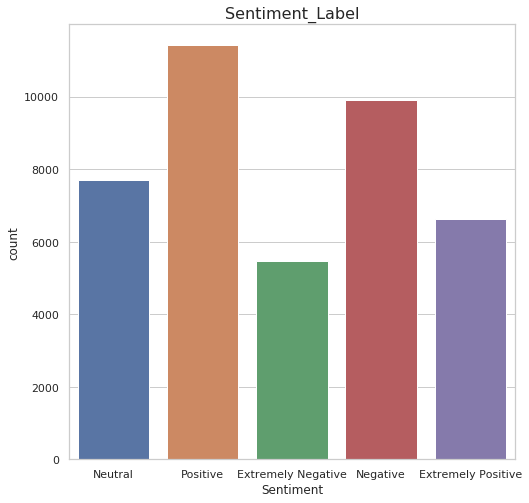

In [9]:
count_categorical(dfCoronaTweets, 'Sentiment', 'Sentiment_Label')

In [10]:
dfCoronaTweets_dummy = pd.get_dummies(dfCoronaTweets['Sentiment'])
dfCoronaTweets_dummy.shape

(41157, 5)

In [11]:
dfCoronaTweets_dummy.head(3)

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1


In [12]:
dfCoronaTweets_concat = pd.concat([dfCoronaTweets, dfCoronaTweets_dummy], axis=1)
dfCoronaTweets_concat.shape

(41157, 11)

In [13]:
#dfCoronaTweets_concat['TweetAt']= dfCoronaTweets_concat['TweetAt'].astype('datetime64[ns]')

In [14]:
#dfCoronaTweets_concat.dtypes

In [15]:
dfCoronaTweets_concat.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,0,0,1,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,1


In [16]:
dfCoronaTweets_gr =  dfCoronaTweets_concat.groupby("TweetAt")['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'].sum()
dfCoronaTweets_gr.reset_index(inplace=True)
dfCoronaTweets_gr.shape

(30, 6)

In [17]:
dfCoronaTweets_gr.head(3)

,TweetAt,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,2020-01-04,90.0,89.0,156.0,125.0,170.0
1,2020-02-04,119.0,141.0,242.0,201.0,251.0
2,2020-03-04,103.0,117.0,208.0,154.0,228.0


In [18]:
dfCoronaTweets_gr_melt = pd.melt(dfCoronaTweets_gr,id_vars=['TweetAt'], value_vars=['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'],
                           var_name = "evaluation", value_name = "count")
dfCoronaTweets_gr_melt.shape

(150, 3)

In [19]:
dfCoronaTweets_gr_melt.head(3)

,TweetAt,evaluation,count
0,2020-01-04,Extremely Negative,90.0
1,2020-02-04,Extremely Negative,119.0
2,2020-03-04,Extremely Negative,103.0


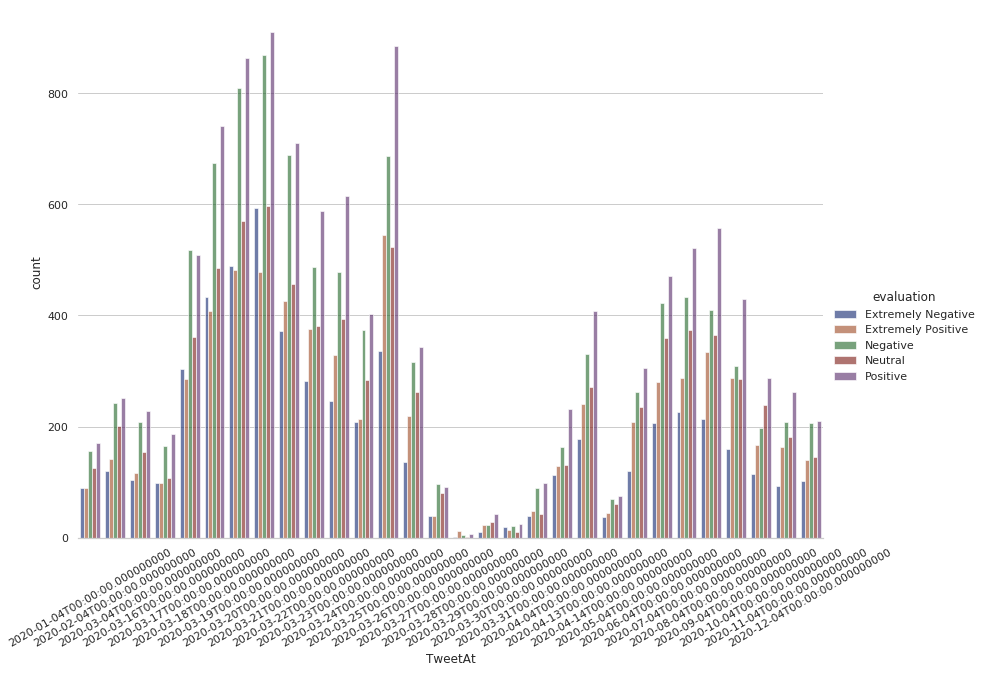

In [20]:
categorical_plot(df=dfCoronaTweets_gr_melt, p_kind="bar", p_x="TweetAt", p_y="count", 
                 p_hue ="evaluation", p_ci="sd", p_palette="dark", p_alpha=.6, p_height=8)

In [21]:
#pd.isnull(dfCoronaTweets_gr_melt)
dfCoronaTweets_gr_melt.isnull().values.any()

False

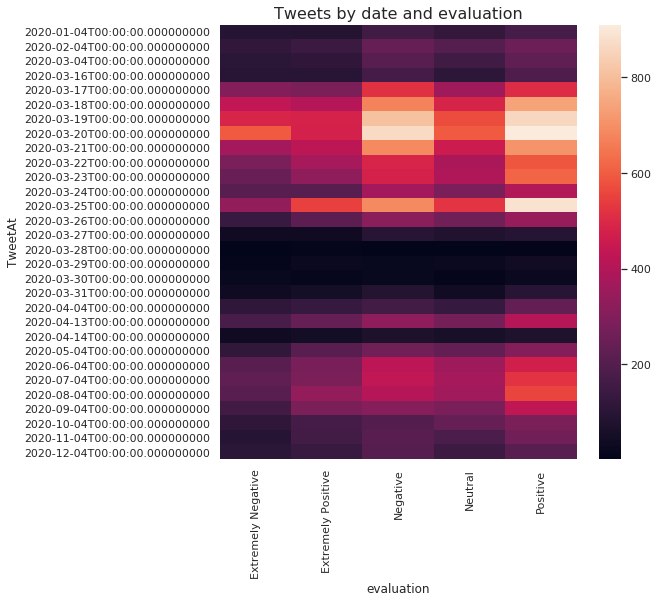

In [22]:
dfCoronaTweets_gr_melt_pivot = dfCoronaTweets_gr_melt.pivot('TweetAt','evaluation','count')
pivot_heatmap(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

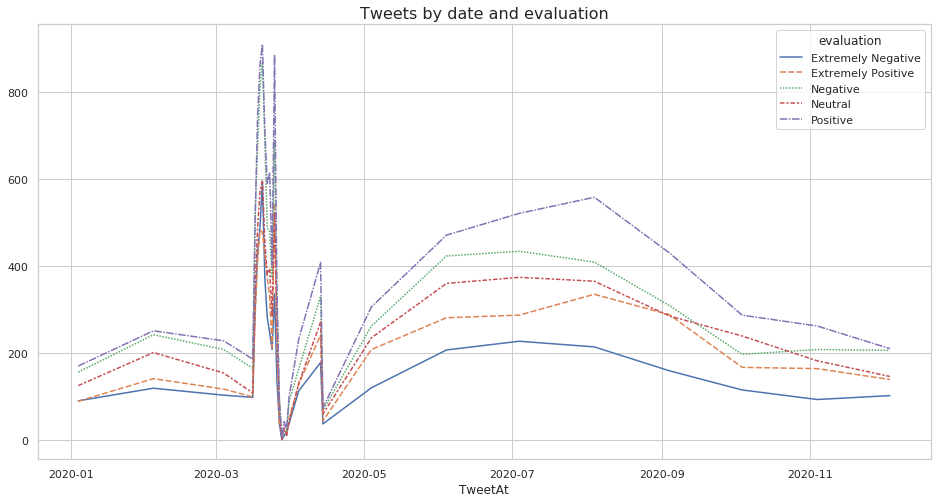

In [23]:
pivot_lineplot(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

In [24]:
#dfCoronaTweets_gr_loc =  dfCoronaTweets_concat.groupby("Location").sum()
#dfCoronaTweets_gr_loc

### Hypothesis 1: Average perception difference in first semester versus second semester of the year

#### Population we have

In [25]:
dfCoronaTweets.shape

(41157, 6)

In [26]:
#I decided to create my own compound index, based on a simple scale [-1, 1]
dfCoronaTweets['compound_index'] = dfCoronaTweets.apply (lambda row: get_compound_acceptance_index(row), axis=1)
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


In [27]:
dfCoronaTweets_first_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] < '2020-07-01']
dfCoronaTweets_first_sem.shape

(33245, 7)

In [28]:
dfCoronaTweets_second_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] > '2020-06-30']
dfCoronaTweets_second_sem.shape

(7912, 7)

In [29]:
dfCoronaTweets_first_sem.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


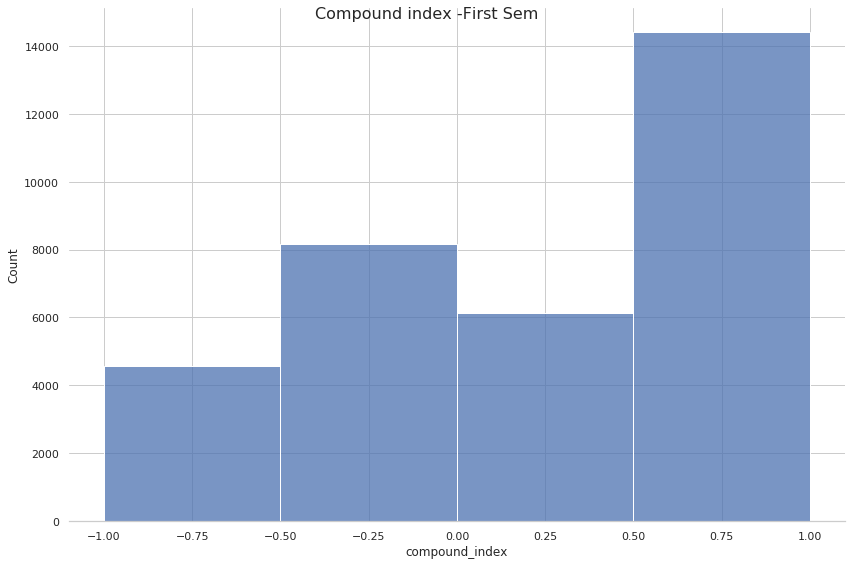

In [30]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

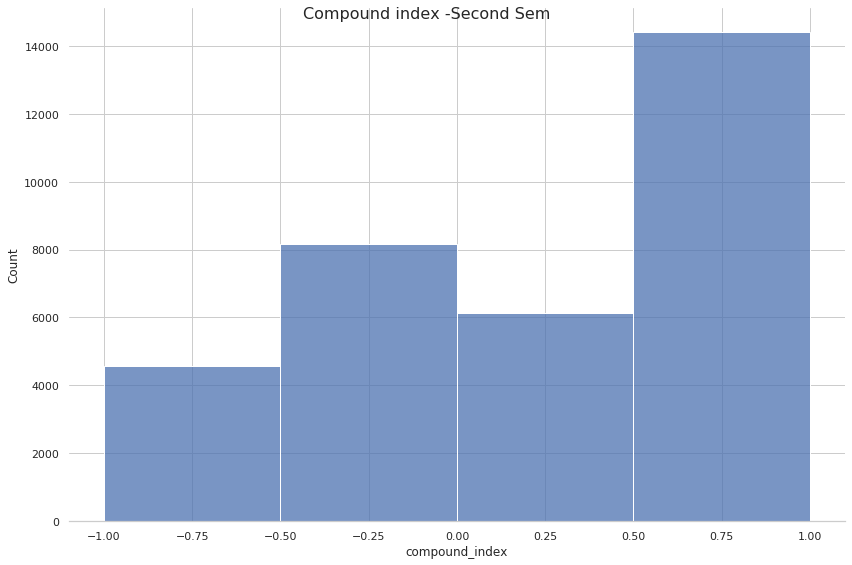

In [31]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [32]:
#sns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 8))
#sns.boxplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem)
#sns.stripplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem, color=".25")
#plt.title('Class - fare price distribution')
#plt.show()

In [33]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.035283501278387724
Second semester mean: 0.09131698685540951


In [34]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6512719165471448
Second semester std: 0.6391529002573112


#### getting sample from both DFs

In [35]:
dfCoronaTweets_first_sem = dfCoronaTweets_first_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_first_sem.shape

(16622, 7)

In [36]:
dfCoronaTweets_second_sem = dfCoronaTweets_second_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_second_sem.shape

(3956, 7)

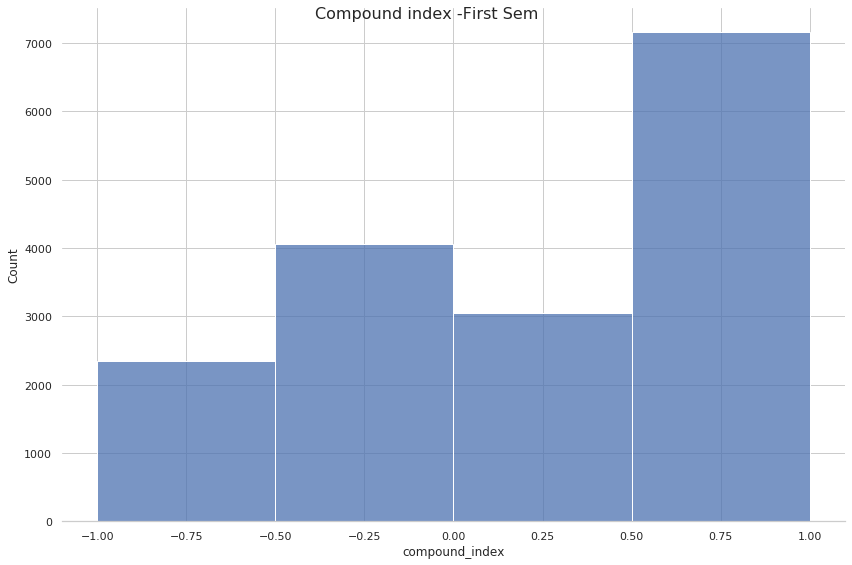

In [37]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

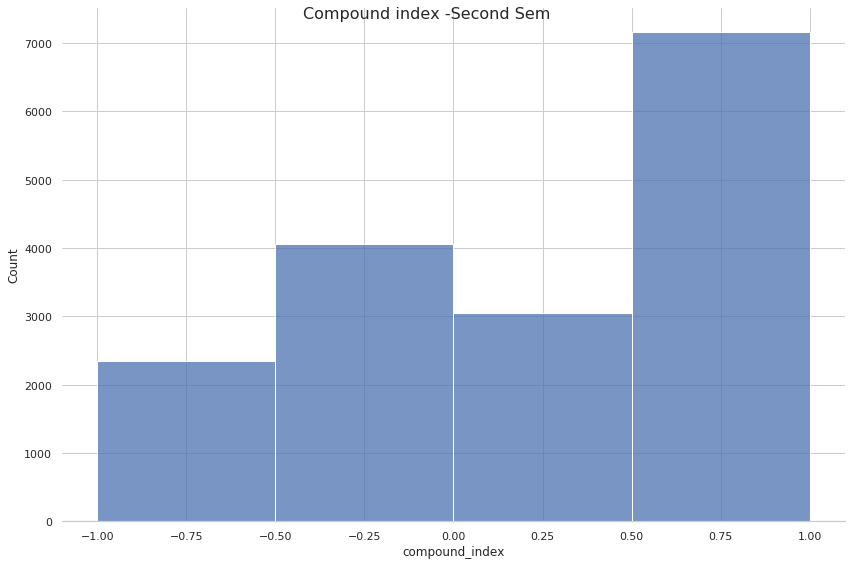

In [38]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [39]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.03164480808566959
Second semester mean: 0.09567745197168857


In [40]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6542201623873477
Second semester std: 0.6389261068542247


In [41]:
#The recall:
# I know the equal_var = True will perform Welch’s t-test, which does not assume equal population variance.
Ttest_indResult_tuple = sts.ttest_ind(dfCoronaTweets_first_sem.compound_index,
                dfCoronaTweets_second_sem.compound_index,
                equal_var= True)

In [42]:
#statistic
Ttest_indResult_tuple[0]

-5.557545338825863

In [43]:
#pvalue
Ttest_indResult_tuple[1]

2.7698633168195436e-08

In [44]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [45]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centred"
                     "on a mean of {} (first semester),"
                     "also contains an observation of {} (second semester)."
                     "Also, "
                     "second semester mean it's {} standard erros away from the first semester mean"
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centredon a mean of 0.03164480808566959 (first semester),also contains an observation of 0.09567745197168857 (second semester).Also, second semester mean it's -5.557545338825863 standard erros away from the first semester mean


## Second dataset - Hypothesis 2

In [46]:
kaggle_path = "antgoldbloom/covid19-data-from-john-hopkins-university"
kaggle_path_Name = "john_hopkins_university_data_set"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [47]:
dfCovid19GlobalDeaths = pd.read_csv(r'john_hopkins_university_data_set/RAW_global_deaths.csv')

In [48]:
dfCovid19GlobalDeaths.head(3)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,743,753,771,787,798,810,822,839,852,870
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492


In [49]:
dfDemograpgics = pd.read_csv("https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv")
dfDemograpgics.head(3)

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income


In [50]:
get_nulls_data(dfDemograpgics)

,Total,PercNotNull
Income Group,0,100.0
Internet users,0,100.0
Birth rate,0,100.0
Country Code,0,100.0
Country Name,0,100.0


In [51]:
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

In [52]:
dfCovid19GlobalDeaths_georeference = build_geodf(dfCovid19GlobalDeaths, lat_col_name='Lat', lon_col_name='Long' )

In [53]:
totalGeoDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()
dfCovid19GlobalDeaths_georeference['Total'] = totalGeoDeathList

In [54]:
dfCovid19GlobalDeaths_georeference.head(3)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,geometry,Total
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,1740,1752,1774,1795,1822,1841,1846,1846,POINT (67.70995 33.93911),1846
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,771,787,798,810,822,839,852,870,POINT (20.16830 41.15330),870
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,2372,2393,2410,2431,2447,2464,2480,2492,POINT (1.65960 28.03390),2492


In [55]:
dfCovid19GlobalDeaths_georeference = dfCovid19GlobalDeaths_georeference[["Country/Region", "Province/State", "Lat", "Long", "geometry", "Total" ]]
dfCovid19GlobalDeaths_georeference.head(3)

,Country/Region,Province/State,Lat,Long,geometry,Total
0,Afghanistan,NaN,33.93911,67.709953,POINT (67.70995 33.93911),1846
1,Albania,NaN,41.15330,20.168300,POINT (20.16830 41.15330),870
2,Algeria,NaN,28.03390,1.659600,POINT (1.65960 28.03390),2492


In [56]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCovid19GlobalDeaths_georeference)

,Total,PercNotNull
Province/State,188,30.63
Long,1,99.63
Lat,1,99.63
Total,0,100.00
geometry,0,100.00
Country/Region,0,100.00


<class 'pandas.core.series.Series'>


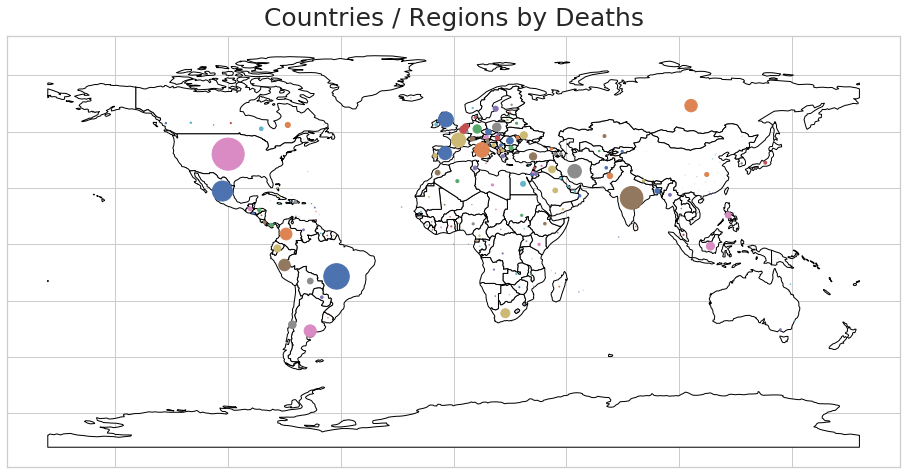

In [57]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

max_cant = len(dfCovid19GlobalDeaths_georeference)

markersize = dfCovid19GlobalDeaths_georeference['Total'] / max_cant
print(type(markersize))


dfCovid19GlobalDeaths_georeference.plot(ax=ax, color=sns.color_palette(None, max_cant), markersize=markersize)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Deaths', fontsize=25, pad=10)

plt.show()

In [58]:
dfCovid19GlobalDeaths_geo_demo = pd.merge(dfCovid19GlobalDeaths_georeference, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

In [59]:
dfCovid19GlobalDeaths_geo_demo.head(3)

,Country/Region,Province/State,Lat,Long,geometry,Total,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Afghanistan,NaN,33.93911,67.709953,POINT (67.70995 33.93911),1846,Afghanistan,AFG,35.253,5.9,Low income
1,Albania,NaN,41.15330,20.168300,POINT (20.16830 41.15330),870,Albania,ALB,12.877,57.2,Upper middle income
2,Algeria,NaN,28.03390,1.659600,POINT (1.65960 28.03390),2492,Algeria,DZA,24.738,16.5,Upper middle income


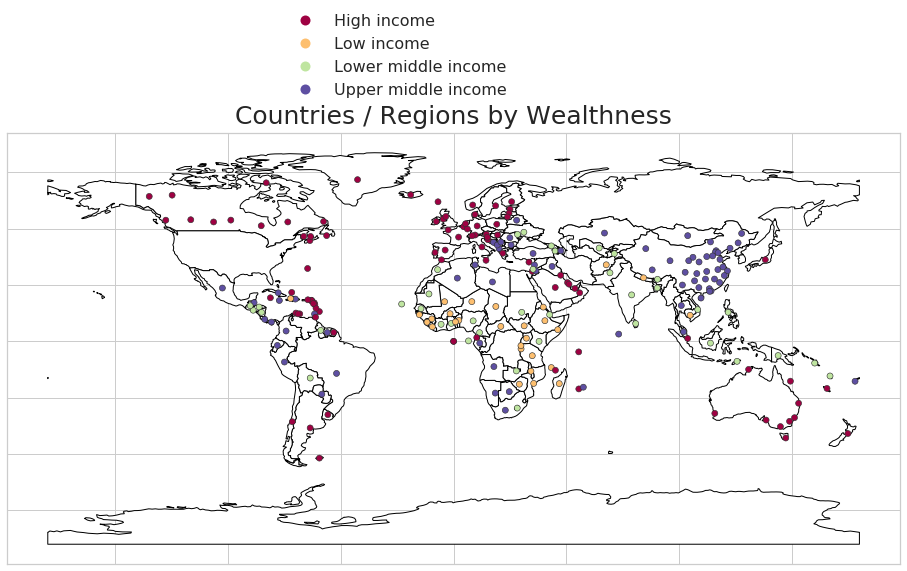

In [60]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

dfCovid19GlobalDeaths_geo_demo.plot(column='Income Group', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False}, ax=ax)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Wealthness', fontsize=25, pad=10)

plt.show()

In [61]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeaths[["Country/Region", "Province/State"]]

In [62]:
#The last columns is the most recent data
#totalDeathList = dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]].to_list()
#dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]]
totalDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()

In [63]:
dfCovid19GlobalDeathsLast['Total'] = totalDeathList

/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
dfCovid19GlobalDeathsLast.head(3)

,Country/Region,Province/State,Total
0,Afghanistan,NaN,1846
1,Albania,NaN,870
2,Algeria,NaN,2492


In [65]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeathsLast.groupby('Country/Region').sum().reset_index()
dfCovid19GlobalDeathsLast.head(3)

,Country/Region,Total
0,Afghanistan,1846
1,Albania,870
2,Algeria,2492


In [66]:
dfCovid19GlobalDeathGeo = pd.merge(dfCovid19GlobalDeathsLast, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

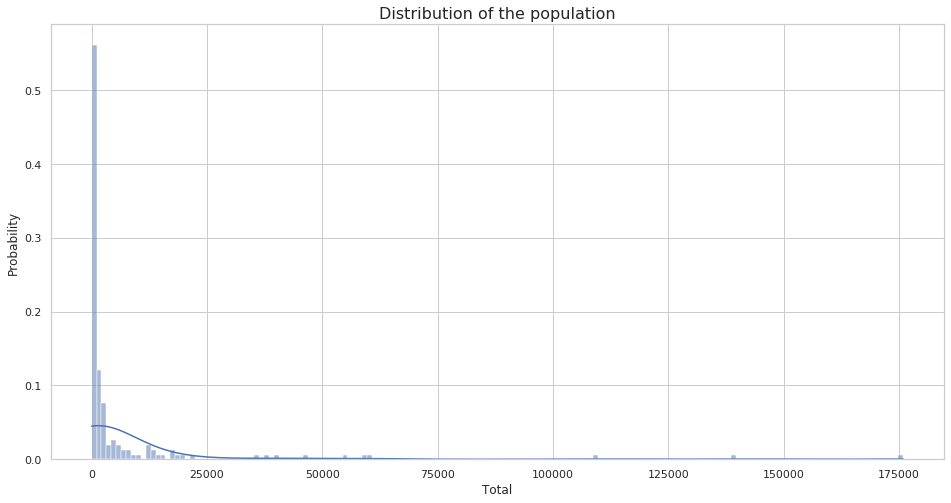

In [67]:
custom_histplot(df = dfCovid19GlobalDeathGeo, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the population")

In [68]:
dfCovid19GlobalDeathGeo_sample = dfCovid19GlobalDeathGeo.sample(frac=0.5, replace=False, random_state=1)
dfCovid19GlobalDeathGeo_sample.shape

(78, 7)

In [69]:
dfCovid19GlobalDeathGeo_sample.head(3)

,Country/Region,Total,Country Name,Country Code,Birth rate,Internet users,Income Group
117,Qatar,239,Qatar,QAT,11.94,85.3000,High income
75,Kazakhstan,2484,Kazakhstan,KAZ,22.73,54.0000,Upper middle income
51,France,54859,France,FRA,12.30,81.9198,High income


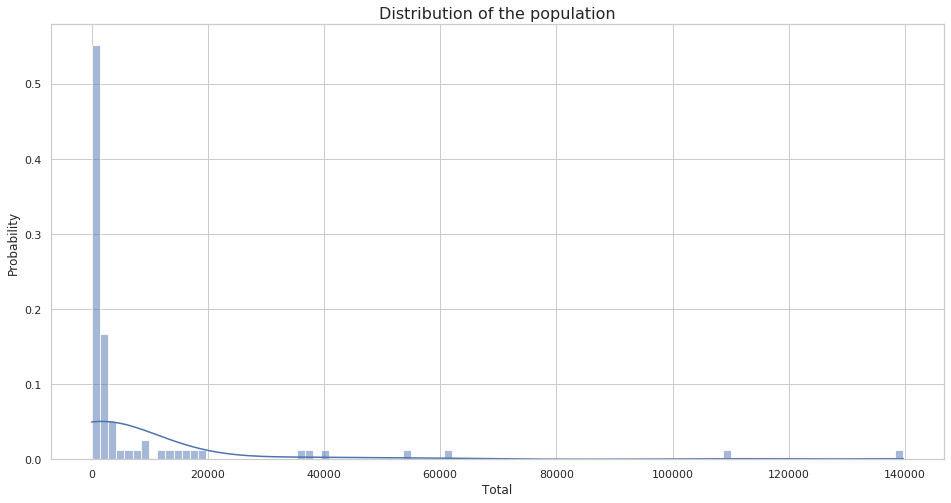

In [70]:
custom_histplot(df = dfCovid19GlobalDeathGeo_sample, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the population")

In [71]:
#Shapiro-Wilk Test: The Shapiro-Wilk tests if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed.
Ttest_indResult_tuple = sts.shapiro(dfCovid19GlobalDeathGeo_sample["Total"])

In [72]:
#statistic
Ttest_indResult_tuple[0]

0.4176267385482788

In [73]:
#pvalue
Ttest_indResult_tuple[1]

5.102604824807526e-16

In [74]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [75]:
IncomeGrps = pd.unique(dfCovid19GlobalDeathGeo_sample["Income Group"].values)
IncomeGrps

array(['High income', 'Upper middle income', 'Lower middle income',
       'Low income'], dtype=object)

In [76]:
dfData_f_test = {grp:dfCovid19GlobalDeathGeo_sample['Total'][dfCovid19GlobalDeathGeo_sample["Income Group"] == grp] for grp in IncomeGrps}
#dfData_f_test

In [77]:
#Anova Test
Ttest_indResult_tuple = sts.f_oneway(dfData_f_test['Low income'], dfData_f_test['Upper middle income'], 
                    dfData_f_test['High income'], dfData_f_test['Lower middle income'])

In [78]:
#statistic
Ttest_indResult_tuple[0]

0.8545602588023815

In [79]:
#pvalue
Ttest_indResult_tuple[1]

0.46861333642258873

In [80]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I don't have enough evidence to reject H0. So we accept is true with a confidence of 95.0% and significance of 5.0%
